In [1]:
import pandas as pd
df = pd.read_csv("/home/zumi/Documents/Kifiya training/Week 0/Resources/data/togo-dapaong_qc.csv")  

In [2]:
# Summary stats
df.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,230.555040,151.258469,116.444352,226.144375,219.568588,27.751788,55.013160,2.368093,3.229490,0.557740,161.741845,10.559568,975.915242,0.000535,0.001382,32.444403,33.543330,NaN
std,322.532347,250.956962,156.520714,317.346938,307.932510,4.758023,28.778732,1.462668,1.882565,0.268923,91.877217,5.915490,2.153977,0.023116,0.026350,10.998334,12.769277,NaN
min,-12.700000,0.000000,0.000000,0.000000,0.000000,14.900000,3.300000,0.000000,0.000000,0.000000,0.000000,0.000000,968.000000,0.000000,0.000000,13.100000,13.100000,NaN
25%,-2.200000,0.000000,0.000000,0.000000,0.000000,24.200000,26.500000,1.400000,1.900000,0.400000,74.800000,6.900000,975.000000,0.000000,0.000000,23.900000,23.600000,NaN
50%,2.100000,0.000000,2.500000,4.400000,4.300000,27.200000,59.300000,2.200000,2.900000,0.500000,199.100000,10.800000,976.000000,0.000000,0.000000,28.400000,28.400000,NaN
75%,442.400000,246.400000,215.700000,422.525000,411.000000,31.100000,80.800000,3.200000,4.400000,0.700000,233.500000,14.100000,977.000000,0.000000,0.000000,40.600000,43.000000,NaN
max,1424.000000,1004.500000,805.700000,1380.000000,1367.000000,41.400000,99.800000,16.100000,23.100000,4.700000,360.000000,86.900000,983.000000,1.000000,2.300000,70.400000,94.600000,NaN


In [3]:
# Missing value report
missing = df.isna().sum()
missing[missing > 0]

Comments    525600
dtype: int64

In [4]:
# Highlight columns with >5% nulls
missing_percent = (df.isna().mean()) * 100
missing_percent[missing_percent > 5]

Comments    100.0
dtype: float64

In [5]:
from scipy.stats import zscore

# Columns to check
cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

# Compute Z-scores
z_scores = df[cols].apply(zscore)

# Flag outliers where |Z| > 3
outliers = (z_scores.abs() > 3)

# View rows with any outlier
df_outliers = df[outliers.any(axis=1)]

# Handle missing values
df_cleaned = df.copy()
df_cleaned[cols] = df_cleaned[cols].fillna(df_cleaned[cols].median())

# Export cleaned data
df_cleaned.to_csv("/home/zumi/Documents/Kifiya training/Week 0/Resources/data/togo_cleaned.csv", index=False)

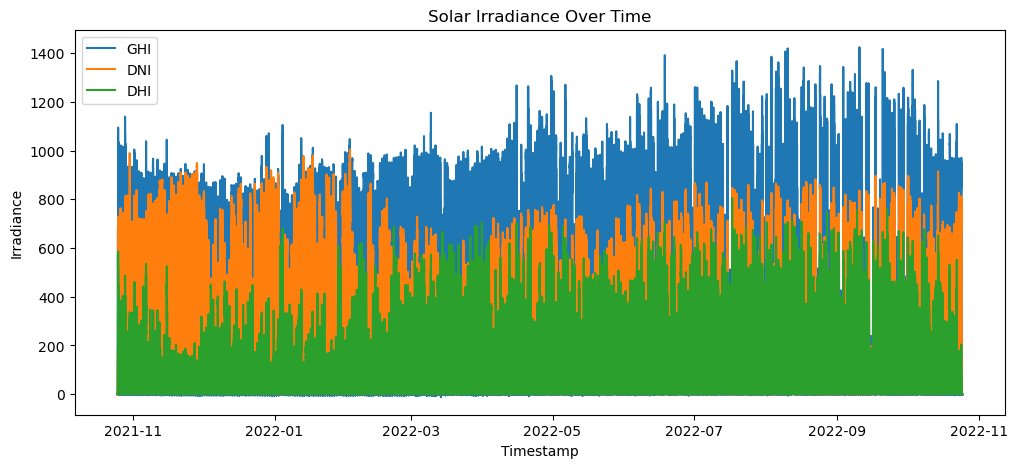

In [6]:
import matplotlib.pyplot as plt

df['Timestamp'] = pd.to_datetime(df['Timestamp'])

plt.figure(figsize=(12, 5))
plt.plot(df['Timestamp'], df['GHI'], label='GHI')
plt.plot(df['Timestamp'], df['DNI'], label='DNI')
plt.plot(df['Timestamp'], df['DHI'], label='DHI')
plt.legend()
plt.title("Solar Irradiance Over Time")
plt.xlabel("Timestamp")
plt.ylabel("Irradiance")
plt.show()

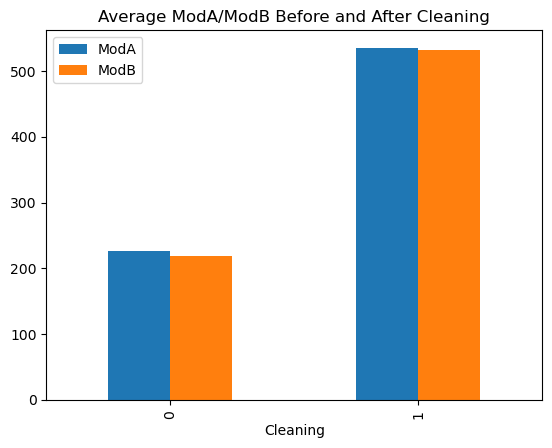

In [7]:
df_cleaned.groupby("Cleaning")[['ModA', 'ModB']].mean().plot(kind='bar')
plt.title("Average ModA/ModB Before and After Cleaning")
plt.show()

<Axes: xlabel='WS', ylabel='GHI'>

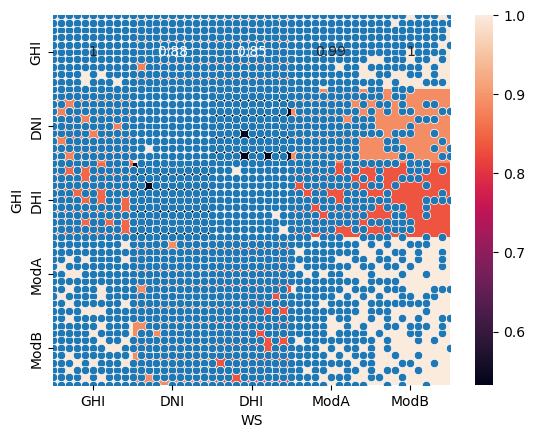

In [8]:
import seaborn as sns

# Heatmap
sns.heatmap(df_cleaned[['GHI', 'DNI', 'DHI', 'ModA', 'ModB']].corr(), annot=True)

# Scatter plots
sns.scatterplot(x='WS', y='GHI', data=df_cleaned)
sns.scatterplot(x='RH', y='Tamb', data=df_cleaned)

<Axes: >

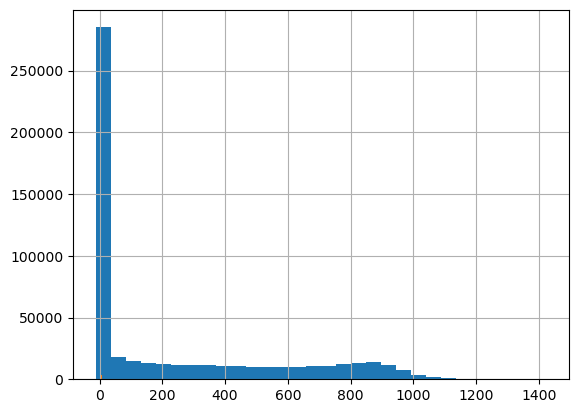

In [9]:
# Histograms
df_cleaned['GHI'].hist(bins=30)
df_cleaned['WS'].hist(bins=30)

<Axes: xlabel='RH', ylabel='Tamb'>

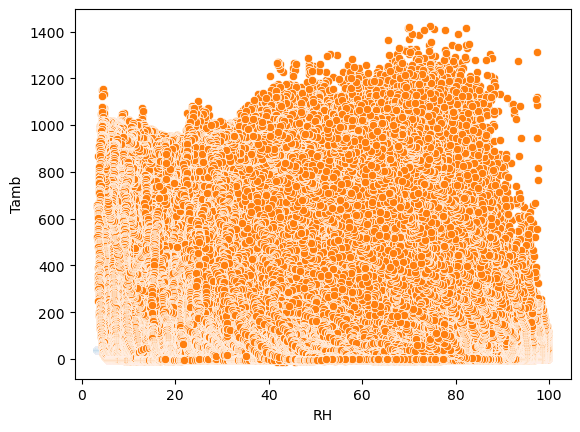

In [10]:
sns.scatterplot(x='RH', y='Tamb', data=df_cleaned)
sns.scatterplot(x='RH', y='GHI', data=df_cleaned)

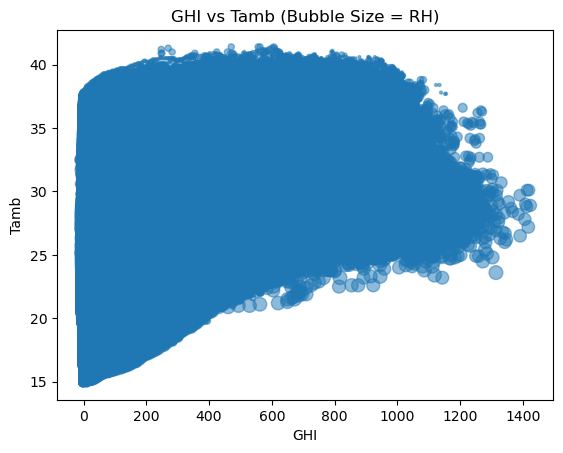

In [11]:
plt.scatter(df_cleaned['GHI'], df_cleaned['Tamb'], s=df_cleaned['RH'], alpha=0.5)
plt.xlabel('GHI')
plt.ylabel('Tamb')
plt.title('GHI vs Tamb (Bubble Size = RH)')
plt.show()